In [1]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Normal
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [2]:
# policy evaluation with Monte Carlo
def eval_policy(policy, env_name, seed, eval_episodes=10):
        eval_env = gym.make(env_name)
        eval_env.reset(seed=seed)
        avg_reward = 0.
        for _ in range(eval_episodes):
            state, _ = eval_env.reset()
            done = False
            step = 0
            while not done:
                action = policy.select_action(np.array(state))
                state, reward, terminated, truncated, _ = eval_env.step(action)
                avg_reward += reward
                step += 1
                done = terminated or truncated
        avg_reward /= eval_episodes

        print("---------------------------------------")
        print(f"Evaluation over {eval_episodes} episodes: {avg_reward:.3f}")
        print("---------------------------------------")
        return avg_reward

In [3]:
acc_list = np.random.random(100) * 100 
acc_list

loss_list =  np.random.random(100)

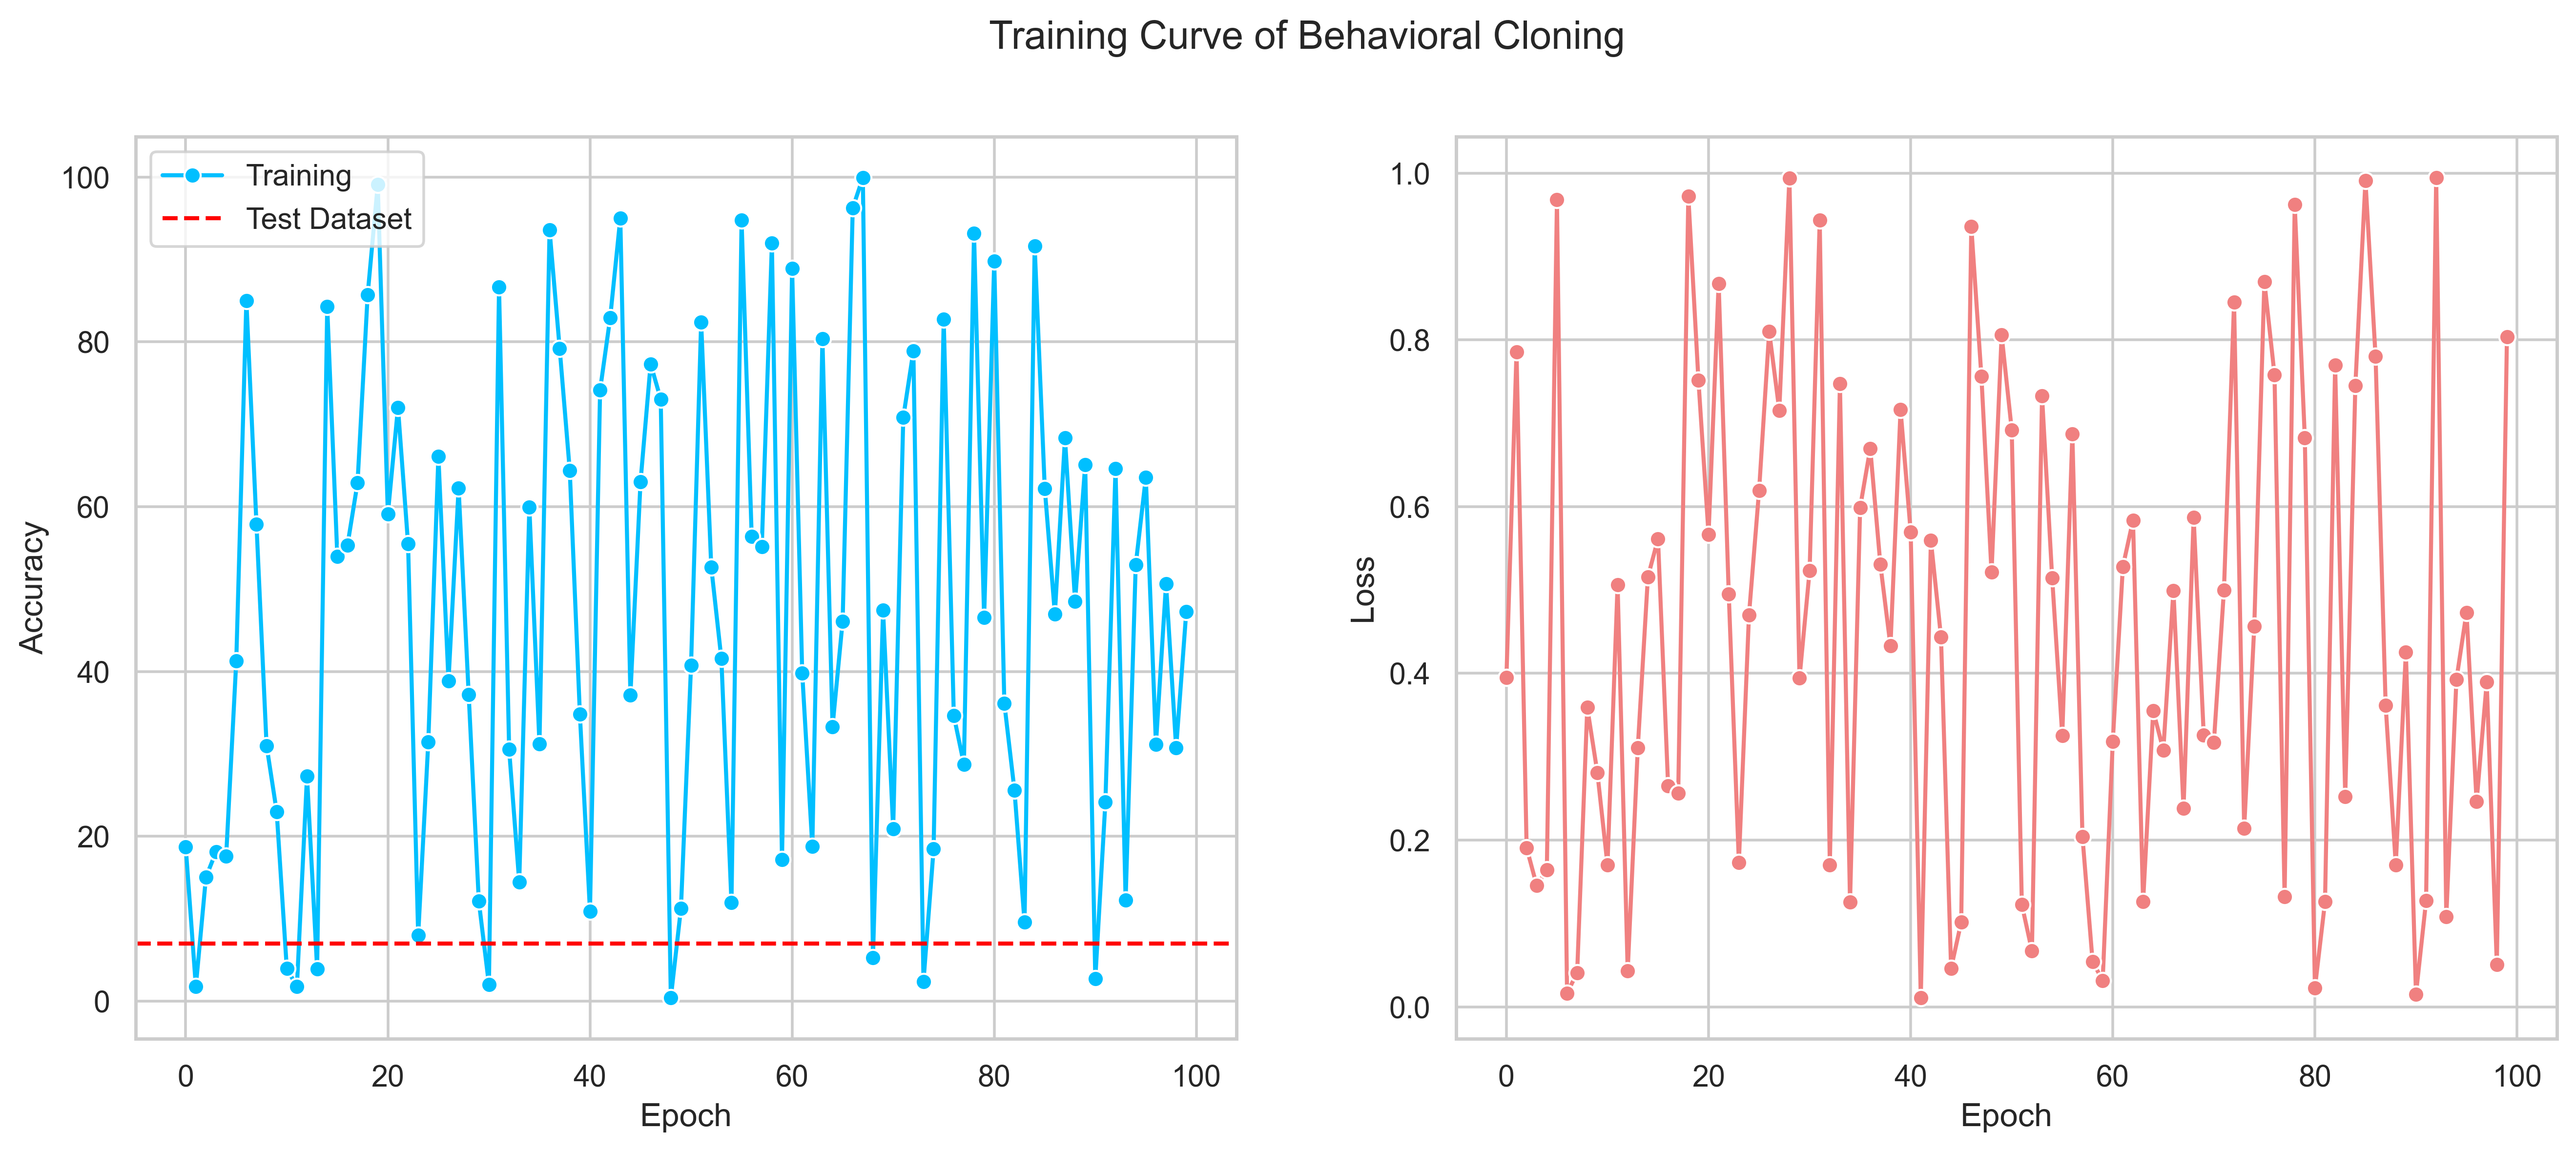

In [30]:
import seaborn as sns
sns.set(style="whitegrid")

val_acc = 8

fig, axs = plt.subplots(ncols=2, figsize=(16, 6), dpi=400)

# Plot using Seaborn
sns.lineplot(x=np.arange(len(acc_list)), 
             y=acc_list, color='deepskyblue', marker='o', linestyle='-', 
             label="Training", ax=axs[0])

axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].axhline(y=val_acc, c='red', linestyle='dashed', label="Test Dataset")
axs[0].legend()

sns.lineplot(x=np.arange(len(loss_list)), 
             y=loss_list, color='lightcoral', marker='o', linestyle='-', ax=axs[1])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')


# Optional: Adding titles and labels
# plt.title('Training Curve of Behavioral Cloning')
fig.suptitle('Training Curve of Behavioral Cloning')
# fig.tight_layout()
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# Show the plot
plt.show()